# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.tests.test_influence
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from numpy.polynomial.polynomial import polyfit
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Business Problem
    To predict an item when sold, wht is the probability that customer would file fraudulent / genuine warranty and  to             understand important factors associared with them.

# 2. Data Collection and Description

In [2]:
warranty_df = pd.read_csv('Warranty Claim.csv')
w_df = warranty_df.copy()
w_df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [3]:
w_df = w_df.iloc[:, 1:]
w_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AC_1001_Issue,358.0,0.332402,0.629446,0.0,0.0,0.0,0.00,2.0
AC_1002_Issue,358.0,0.329609,0.615182,0.0,0.0,0.0,0.75,2.0
AC_1003_Issue,358.0,0.203911,0.529559,0.0,0.0,0.0,0.00,2.0
TV_2001_Issue,358.0,0.377095,0.621943,0.0,0.0,0.0,1.00,2.0
TV_2002_Issue,358.0,0.452514,0.670910,0.0,0.0,0.0,1.00,2.0
TV_2003_Issue,358.0,0.268156,0.508353,0.0,0.0,0.0,0.00,2.0
Claim_Value,358.0,11994.534916,12063.213579,0.0,4006.0,7194.0,15000.00,50000.0
Service_Centre,358.0,12.812849,1.766844,10.0,12.0,13.0,15.00,16.0
Product_Age,358.0,201.843575,259.731564,3.0,14.0,60.0,303.75,991.0
Call_details,358.0,11.931844,11.559474,0.5,1.6,6.5,23.00,30.0


In [4]:
w_df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [5]:
w_df['Fraud'].value_counts()

0    323
1     35
Name: Fraud, dtype: int64

### Out of total data 323 cases are genuine while 35 are fraud.

Text(0, 0.5, 'fraud Cases')

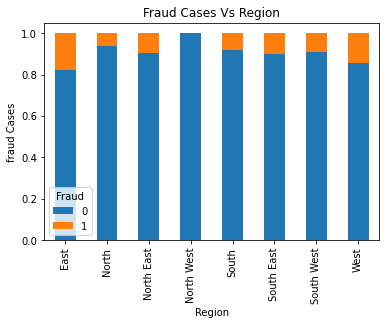

In [6]:
region_table = pd.crosstab(w_df.Region,w_df.Fraud)
region_table.div(region_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Region')
plt.xlabel('Region')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

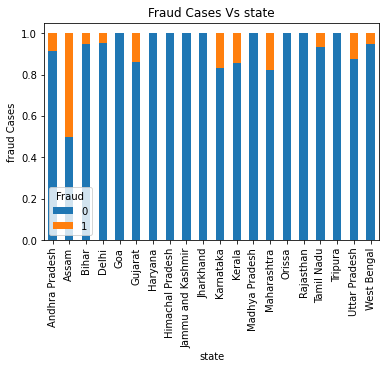

In [7]:
state_table = pd.crosstab(w_df.State,w_df.Fraud)
state_table.div(state_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs state')
plt.xlabel('state')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

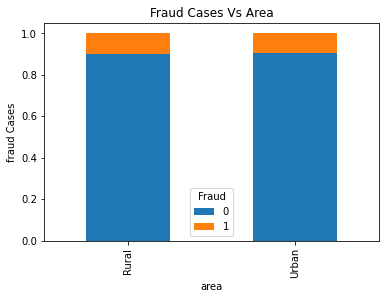

In [8]:
area_table = pd.crosstab(w_df.Area,w_df.Fraud)
area_table.div(area_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Area')
plt.xlabel('area')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

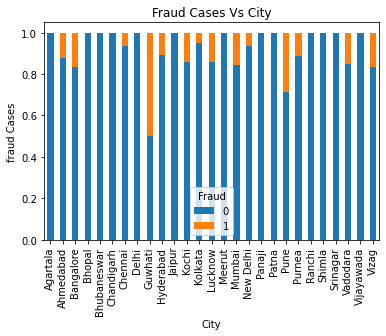

In [9]:
city_table = pd.crosstab(w_df.City,w_df.Fraud)
city_table.div(city_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs City')
plt.xlabel('City')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

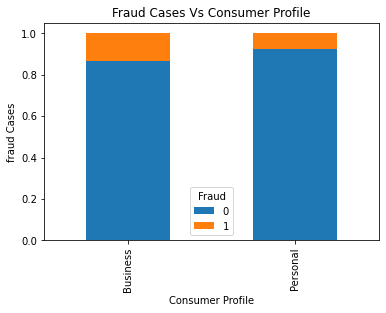

In [10]:
profile_table = pd.crosstab(w_df.Consumer_profile,w_df.Fraud)
profile_table.div(profile_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Consumer Profile')
plt.xlabel('Consumer Profile')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

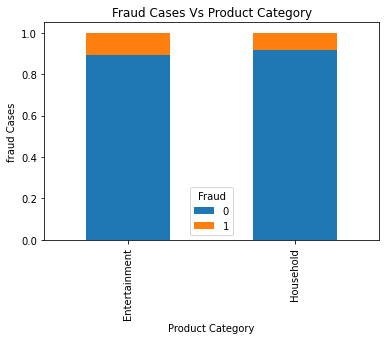

In [11]:
category_table = pd.crosstab(w_df.Product_category,w_df.Fraud) 
category_table.div(category_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

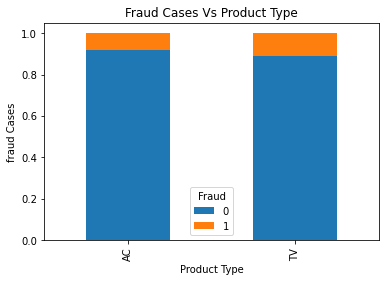

In [12]:
type_table = pd.crosstab(w_df.Product_type,w_df.Fraud)
type_table.div(type_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Product Type')
plt.xlabel('Product Type')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

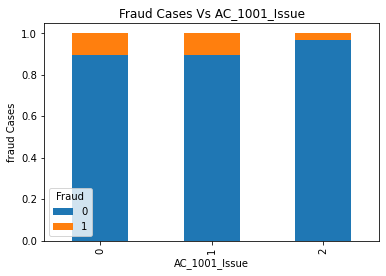

In [13]:
AC1001_table = pd.crosstab(w_df.AC_1001_Issue,w_df.Fraud)
AC1001_table.div(AC1001_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs AC_1001_Issue')
plt.xlabel('AC_1001_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

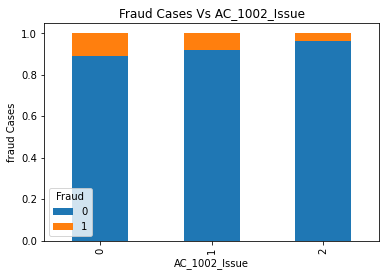

In [14]:
AC1002_table = pd.crosstab(w_df.AC_1002_Issue,w_df.Fraud)
AC1002_table.div(AC1002_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs AC_1002_Issue')
plt.xlabel('AC_1002_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

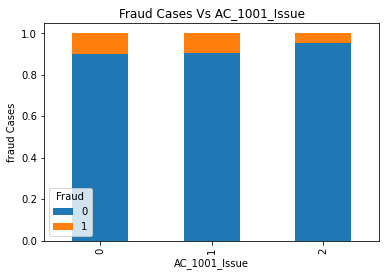

In [15]:
AC1003_table = pd.crosstab(w_df.AC_1003_Issue,w_df.Fraud)
AC1003_table.div(AC1003_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs AC_1001_Issue')
plt.xlabel('AC_1001_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

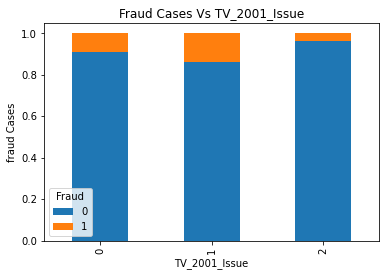

In [16]:
TV2001_table = pd.crosstab(w_df.TV_2001_Issue,w_df.Fraud)
TV2001_table.div(TV2001_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs TV_2001_Issue')
plt.xlabel('TV_2001_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

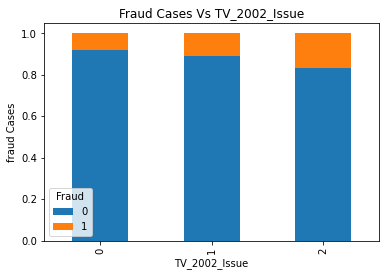

In [17]:
TV2002_table = pd.crosstab(w_df.TV_2002_Issue,w_df.Fraud)
TV2002_table.div(TV2002_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs TV_2002_Issue')
plt.xlabel('TV_2002_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

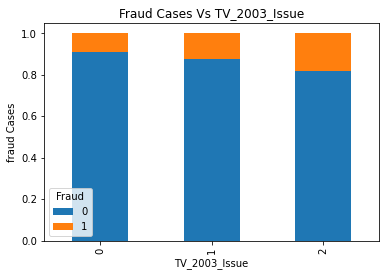

In [18]:
TV2003_table = pd.crosstab(w_df.TV_2003_Issue,w_df.Fraud)
TV2003_table.div(TV2003_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs TV_2003_Issue')
plt.xlabel('TV_2003_Issue')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

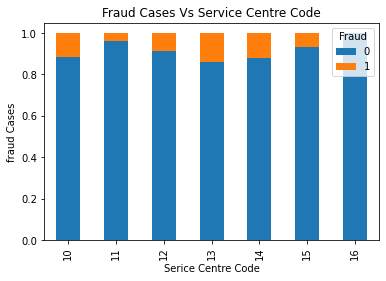

In [19]:
service_table = pd.crosstab(w_df.Service_Centre,w_df.Fraud)
service_table.div(service_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Service Centre Code')
plt.xlabel('Serice Centre Code')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

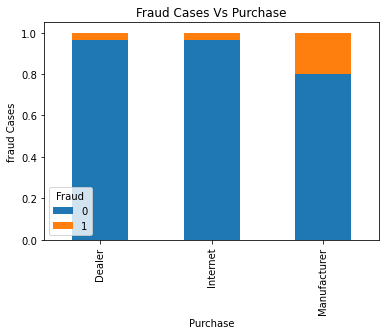

In [20]:
purchase_table = pd.crosstab(w_df.Purchased_from,w_df.Fraud)
purchase_table.div(purchase_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'fraud Cases')

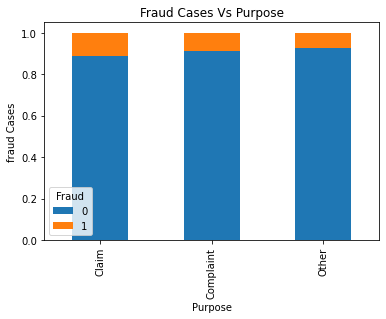

In [21]:
purpose_table = pd.crosstab(w_df.Purpose,w_df.Fraud)
purpose_table.div(purpose_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('fraud Cases')

Text(0, 0.5, 'Frequency')

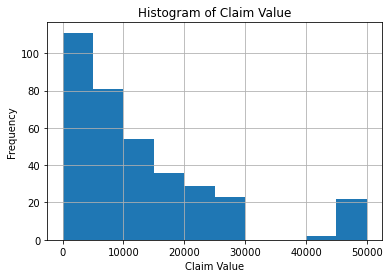

In [22]:
w_df.Claim_Value.hist()
plt.title('Histogram of Claim Value')
plt.xlabel('Claim Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

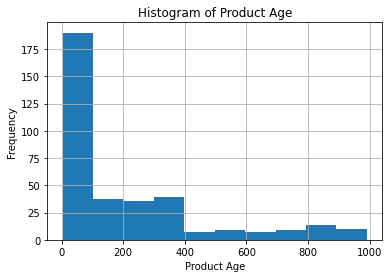

In [23]:
w_df.Product_Age.hist()
plt.title('Histogram of Product Age')
plt.xlabel('Product Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

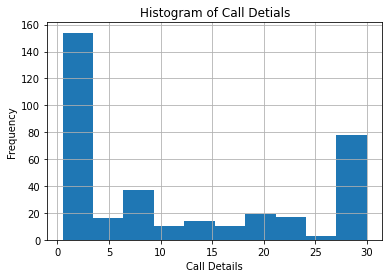

In [24]:
w_df.Call_details.hist()
plt.title('Histogram of Call Detials')
plt.xlabel('Call Details')
plt.ylabel('Frequency')

Text(0, 0.5, 'fraud Cases')

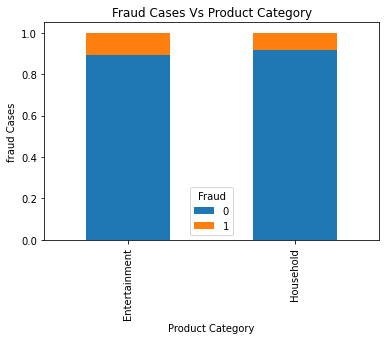

In [25]:
category_table = pd.crosstab(w_df.Product_category,w_df.Fraud) 
category_table.div(category_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fraud Cases Vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('fraud Cases')

# 3. Preparing Train and Test Data Sets

In [26]:
w_df1 = w_df.copy()

In [27]:
w_df1['Region'] = w_df1['Region'].map({'South': 0, 'North': 1, 'East': 2, 'West': 3, 'North East': 4, 
                                       'North West': 5, 'South East': 6, 'South West': 7})

In [28]:
w_df1['State'] = w_df1['State'].map({'Karnataka': 0, 'Haryana': 1, 'Tamil Nadu': 2, 'Jharkhand': 3, 'Kerala': 4,
       'Andhra Pradesh': 5, 'Bihar': 6, 'Gujarat': 7, 'Delhi': 8, 'Maharashtra': 9,
       'West Bengal':10, 'Goa': 11, 'Jammu and Kashmir': 12, 'Assam': 13, 'Rajasthan': 14,
       'Madhya Pradesh': 15, 'Uttar Pradesh': 16, 'Tripura': 17, 'Himachal Pradesh': 18,
       'Orissa':19})

In [29]:
w_df1['Area'] = w_df1['Area'].map({'Urban': 0, 'Rural': 1})

In [30]:
w_df1['City'] = w_df1['City'].map({'Bangalore': 0, 'Chandigarh': 1, 'Chennai': 2, 'Ranchi': 3, 'Kochi': 4,
       'Hyderabad': 5, 'Patna': 6, 'Purnea': 7, 'Vadodara': 8, 'New Delhi': 9, 'Mumbai': 10,
       'Ahmedabad': 11, 'Pune': 12, 'Kolkata': 13, 'Vizag': 14, 'Panaji': 15, 'Srinagar': 16,
       'Guwhati': 17, 'Jaipur': 18, 'Bhopal': 19, 'Meerut': 20, 'Delhi': 21, 'Agartala': 22,
       'Shimla': 23, 'Bhubaneswar': 24, 'Vijayawada': 25, 'Lucknow': 26})

In [31]:
w_df1['Consumer_profile'] = w_df1['Consumer_profile'].map({'Business': 0, 'Personal': 1})

In [32]:
w_df1['Product_category'] = w_df1['Product_category'].map({'Entertainment': 0, 'Household': 1})

In [33]:
w_df1['Product_type'] = w_df1['Product_type'].map({'TV': 0, 'AC': 1})

In [34]:
w_df1['Service_Centre'] = w_df1['Service_Centre'].map({10: 0, 12: 1, 14: 2, 16: 3, 15: 4, 13: 5, 11: 6})

In [35]:
w_df1['Purchased_from'] = w_df1['Purchased_from'].map({'Manufacturer': 0, 'Dealer': 1, 'Internet': 2})

In [36]:
w_df1['Purpose'] = w_df1['Purpose'].map({'Complaint': 0, 'Claim': 1, 'Other': 2})

In [37]:
w_X = w_df1.loc[:, w_df1.columns != 'Fraud']
w_y = w_df1.loc[:, w_df1.columns == 'Fraud']

In [38]:
ss = StandardScaler()
w_X = ss.fit_transform(w_X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(w_X, w_y, test_size=0.2, random_state=0)

# 4. Decision Tree Classifier Model

In [40]:
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred = DTClassifier.predict(X_test)

In [42]:
print('Accuracy of Decision Tree algorithm is:', metrics.accuracy_score(y_pred,y_test))

Accuracy of Decision Tree algorithm is: 0.8611111111111112


# 5. Naive Bayes Classifier Model

In [43]:
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

C:\Users\Aditya Jawlekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [44]:
y_pred_NB = NBClassifier.predict(X_test)
y_pred_NB

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
print('Accuracy of Naive Bayes algorithm is:', metrics.accuracy_score(y_pred_NB,y_test))

Accuracy of Naive Bayes algorithm is: 0.8888888888888888
